# Task # 3 - To Explore Unsupervised Machine Learning

**Question:** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Unsupervised learning:  
- Unsupervised learning is a branch of machine learning that learns from test data that has not been labeled, classified or categorized. Instead of responding to feedback, unsupervised learning identifies commonalities in the data and reacts based on the presence or absence of such commonalities in each new piece of data. Alternatives include supervised learning and reinforcement learning.

### Types of Unsupervised Learning
- Unsupervised learning problems further grouped into clustering and association problems.

### 1. Clustering
- Clustering is an important concept when it comes to unsupervised learning.  
- It mainly deals with finding a structure or pattern in a collection of uncategorized data.  
- Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data.  
- You can also modify how many clusters your algorithms should identify. 

#### Kmeans Clustering
- Kmeans is one of the most popular “clustering” algorithms.  
- K-means stores k centroids that it uses to define clusters.  
- A point is considered to be in a particular cluster if it is closer to that cluster’s centroid than any other centroid.

## Index
1. Importing Libraries And Data  
2. Explore the data  
3. Prediction using Kmeans  
4. Visualization of result  
5. Elbow Method to Predict Optimum value of K  
6. Prediction using Optimal value of K  
7. Analysis & Visualization of Result

# 1. Importing Libraries And Data

In [69]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from sklearn import datasets

In [70]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns =iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
y_actual= iris.target
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2.Explore the data

In [72]:
iris_df.shape

(150, 4)

In [73]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

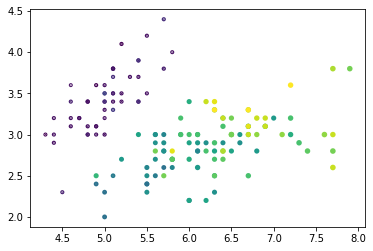

In [75]:
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],iris_df['petal length (cm)'],iris_df['petal width (cm)'],linewidths=3 )

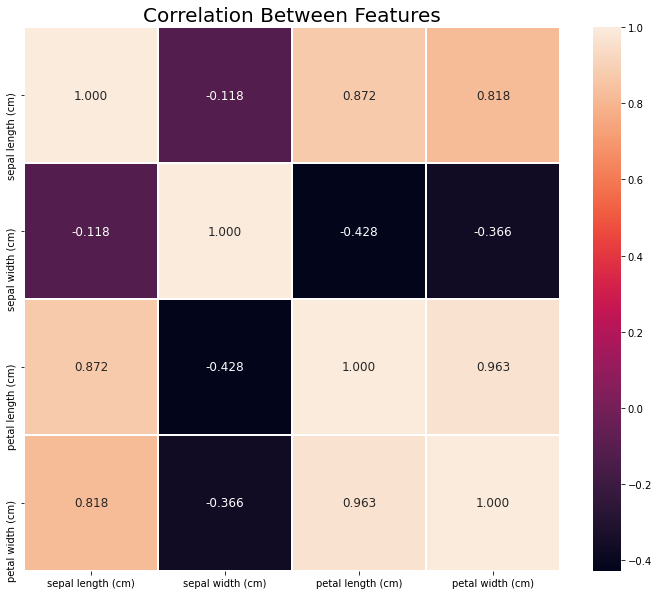

In [76]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(iris_df.corr(), annot=True,annot_kws = {"size": 12}, linewidths=0.5, fmt = '.3f', ax=ax)
plt.title("Correlation Between Features", fontsize = 20)
plt.show()

# 3. Prediction using Kmeans

In [77]:
# let we randomly assume k = 4 clusters...
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++')
km

KMeans(n_clusters=4)

In [78]:
km.fit(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

KMeans(n_clusters=4)

In [79]:
y_predicted=km.predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3])

In [80]:
iris_df['clusters'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 4.Visualization of result

In [81]:
iris_df.clusters.unique()

array([0, 3, 2, 1])

In [82]:
df1 = iris_df[iris_df.clusters==0]
df2 = iris_df[iris_df.clusters==1]
df3 = iris_df[iris_df.clusters==2]
df4 = iris_df[iris_df.clusters==3]

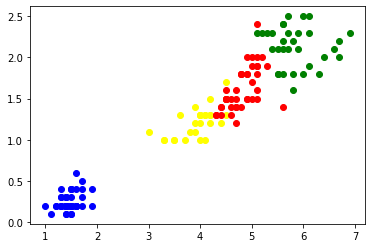

In [83]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='red')

# 5. Elbow Method to Predict Optimum value of K
- A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.  
- The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [84]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [85]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25552380952379,
 46.44618205128204,
 39.03998724608725,
 34.43854057492214,
 30.014398496240617,
 27.909224310776942]

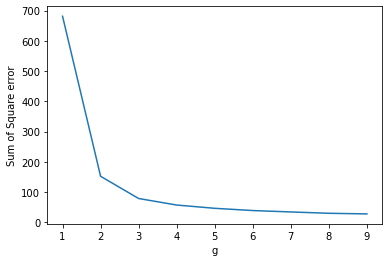

In [86]:
plt.xlabel('g')
plt.ylabel('Sum of Square error')
plt.plot(k_rng,sse)

In [87]:
# As we see above graph, let take clusters = 3
km3 = KMeans(n_clusters=3, init='k-means++')

# 6. Prediction using Optimal value of K

In [88]:
km3.fit(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

KMeans(n_clusters=3)

In [89]:
y_predicted3=km3.predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [90]:
iris_df['clusters3'] = y_predicted3
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters,clusters3
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [91]:
iris_df.clusters3.unique()

array([0, 1, 2])

# 7. Analysis & Visualization of Result

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [93]:
accuracy_score(y_actual, y_predicted3)

0.8933333333333333

In [94]:
pd.crosstab(y_actual, y_predicted3)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


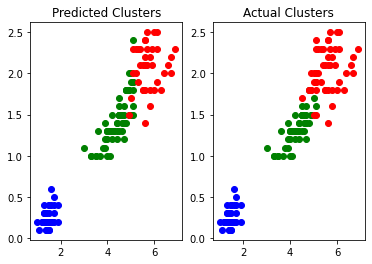

In [97]:
plt.figure()

plt.subplot(1,2,1)

df1 = iris_df[iris_df.clusters3==0]
df2 = iris_df[iris_df.clusters3==1]
df3 = iris_df[iris_df.clusters3==2]

plt.title("Predicted Clusters")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')

plt.subplot(1,2,2)
df1 = iris_df[y_actual==0]
df2 = iris_df[y_actual==1]
df3 = iris_df[y_actual==2]

plt.title("Actual Clusters")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')